### Contents
* Import
* Data Manipulation
* Decision Trees

## 1 Import

In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import graphviz
import matplotlib.pyplot as plt
import scipy
from sklearn import datasets
from sklearn import metrics
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from matplotlib.pyplot import figure

In [2]:
#import data
df=pd.read_csv(os.path.join(r"C:\Users\Samth\CareerFoundry Projects\Data Specilization ML\1 DATA\MANIPULATED DATA\df_scaled.csv"))

In [3]:
#import pleasant weather data
pleasantdf=pd.read_csv(os.path.join(r"C:\Users\Samth\CareerFoundry Projects\Other\Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv"))

## 2 Data Manipulation

In [4]:
df.columns.tolist()

['Unnamed: 0',
 'DATE',
 'MONTH',
 'BASEL_cloud_cover',
 'BASEL_wind_speed',
 'BASEL_humidity',
 'BASEL_pressure',
 'BASEL_global_radiation',
 'BASEL_precipitation',
 'BASEL_snow_depth',
 'BASEL_sunshine',
 'BASEL_temp_mean',
 'BASEL_temp_min',
 'BASEL_temp_max',
 'BELGRADE_cloud_cover',
 'BELGRADE_humidity',
 'BELGRADE_pressure',
 'BELGRADE_global_radiation',
 'BELGRADE_precipitation',
 'BELGRADE_sunshine',
 'BELGRADE_temp_mean',
 'BELGRADE_temp_min',
 'BELGRADE_temp_max',
 'BUDAPEST_cloud_cover',
 'BUDAPEST_humidity',
 'BUDAPEST_pressure',
 'BUDAPEST_global_radiation',
 'BUDAPEST_precipitation',
 'BUDAPEST_sunshine',
 'BUDAPEST_temp_mean',
 'BUDAPEST_temp_min',
 'BUDAPEST_temp_max',
 'DEBILT_cloud_cover',
 'DEBILT_wind_speed',
 'DEBILT_humidity',
 'DEBILT_pressure',
 'DEBILT_global_radiation',
 'DEBILT_precipitation',
 'DEBILT_sunshine',
 'DEBILT_temp_mean',
 'DEBILT_temp_min',
 'DEBILT_temp_max',
 'DUSSELDORF_cloud_cover',
 'DUSSELDORF_wind_speed',
 'DUSSELDORF_humidity',
 'DUSSELDO

In [5]:
pleasantdf.columns.tolist()

['DATE',
 'BASEL_pleasant_weather',
 'BELGRADE_pleasant_weather',
 'BUDAPEST_pleasant_weather',
 'DEBILT_pleasant_weather',
 'DUSSELDORF_pleasant_weather',
 'HEATHROW_pleasant_weather',
 'KASSEL_pleasant_weather',
 'LJUBLJANA_pleasant_weather',
 'MAASTRICHT_pleasant_weather',
 'MADRID_pleasant_weather',
 'MUNCHENB_pleasant_weather',
 'OSLO_pleasant_weather',
 'SONNBLICK_pleasant_weather',
 'STOCKHOLM_pleasant_weather',
 'VALENTIA_pleasant_weather']

In [6]:
#dropping unrelated station data from main dataset
activedf=df.drop(columns=['GDANSK_cloud_cover',
 'GDANSK_humidity',
 'GDANSK_precipitation',
 'GDANSK_snow_depth',
 'GDANSK_temp_mean',
 'GDANSK_temp_min',
 'GDANSK_temp_max','ROMA_cloud_cover',
 'ROMA_wind_speed',
 'ROMA_humidity',
 'ROMA_pressure',
 'ROMA_sunshine',
 'ROMA_temp_mean','TOURS_wind_speed',
 'TOURS_humidity',
 'TOURS_pressure',
 'TOURS_global_radiation',
 'TOURS_precipitation',
 'TOURS_temp_mean',
 'TOURS_temp_min',
 'TOURS_temp_max','Unnamed: 0'])

In [7]:
activedf.head()

DATE     MONTH  BASEL_cloud_cover  BASEL_wind_speed  BASEL_humidity  \
0 -1.707663 -1.599964           0.660514          -0.02793        0.826097   
1 -1.707657 -1.599964           0.244897          -0.02793        0.735760   
2 -1.707652 -1.599964           1.076130          -0.02793        1.277781   
3 -1.707646 -1.599964          -1.001953          -0.02793        1.458455   
4 -1.707641 -1.599964           0.244897          -0.02793        1.729466   

   BASEL_pressure  BASEL_global_radiation  BASEL_precipitation  \
0       -0.001949               -1.101066            -0.265148   
1       -0.001949               -1.058108             1.658760   
2       -0.001949               -1.251420             0.155707   
3       -0.001949               -0.821838            -0.445514   
4       -0.001949               -0.746661            -0.164944   

   BASEL_snow_depth  BASEL_sunshine  ...  VALENTIA_cloud_cover  \
0         -0.179228       -0.902918  ...             -0.443701   
1         -0.179228       -0.810126  ...              0.783085   
2         -0.179228       -1.065304  ...              0.783085   
3         -0.179228       -0.114186  ...              0.783085   
4         -0.179228        0.187388  ...             -1.670486   

   VALENTIA_humidity  VALENTIA_pressure  VALENTIA_global_radiation  \
0           0.761754          -1.299744                  -0.806427   
1           1.183580          -1.262455                  -1.042055   
2           1.183580          -0.432779                  -1.136306   
3           0.480538           0.387574                  -1.183432   
4          -0.363113           1.729970                  -0.794645   

   VALENTIA_precipitation  VALENTIA_snow_depth  VALENTIA_sunshine  \
0               -0.088407            -0.024706           0.372147   
1                0.503361            -0.024706          -0.829285   
2               -0.396127            -0.024706          -1.009500   
3                0.669056            -0.024706          -1.039536   
4               -0.490810            -0.024706           0.672505   

   VALENTIA_temp_mean  VALENTIA_temp_min  VALENTIA_temp_max  
0           -0.668215          -0.519743          -0.752237  
1           -0.548046          -0.629054          -0.407141  
2           -0.067372           0.054135          -0.177078  
3           -0.998679          -0.164486          -0.838511  
4           -1.509396          -1.339569          -1.471186  

[5 rows x 149 columns]

In [20]:
#Create an 'X' and y df by dropping the unneeded columns.
X = activedf.drop(['DATE', 'MONTH'], axis=1)
y = pleasantdf.drop(['DATE'],axis=1)

In [21]:
#Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=37)

In [22]:
#viewing shape of training and test sets
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17212, 147)
(5738, 147)
(17212, 15)
(5738, 15)


In [23]:
print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


#converting df to numpy array
X_test = np.array(X_test) 
X_train = np.array(X_train)

## 3 Decisiom Tree

[Text(0.3711019955757369, 0.9821428571428571, 'x[49] <= 0.403\ngini = 0.314\nsamples = 17212\nvalue = [[12978, 4234]\n[11216, 5996]\n[11633, 5579]\n[13890, 3322]\n[13531, 3681]\n[13498, 3714]\n[14436, 2776]\n[12426, 4786]\n[13646, 3566]\n[9516, 7696]\n[13642, 3570]\n[14566, 2646]\n[17212, 0]\n[14295, 2917]\n[16349, 863]]'),
 Text(0.06573841573993183, 0.9464285714285714, 'x[98] <= -0.216\ngini = 0.099\nsamples = 10782\nvalue = [[10123, 659]\n[9060, 1722]\n[9508, 1274]\n[10694, 88]\n[10782, 0]\n[10156, 626]\n[10703, 79]\n[9831, 951]\n[10709, 73]\n[8020, 2762]\n[10373, 409]\n[10535, 247]\n[10782, 0]\n[10531, 251]\n[10618, 164]]'),
 Text(0.019241397852262313, 0.9107142857142857, 'x[19] <= 0.053\ngini = 0.028\nsamples = 7547\nvalue = [[7428, 119]\n[6863, 684]\n[7197, 350]\n[7535, 12]\n[7547, 0]\n[7504, 43]\n[7525, 22]\n[7332, 215]\n[7523, 24]\n[7547, 0]\n[7398, 149]\n[7517, 30]\n[7547, 0]\n[7518, 29]\n[7534, 13]]'),
 Text(0.007882155653695525, 0.875, 'x[78] <= 0.243\ngini = 0.004\nsamples =

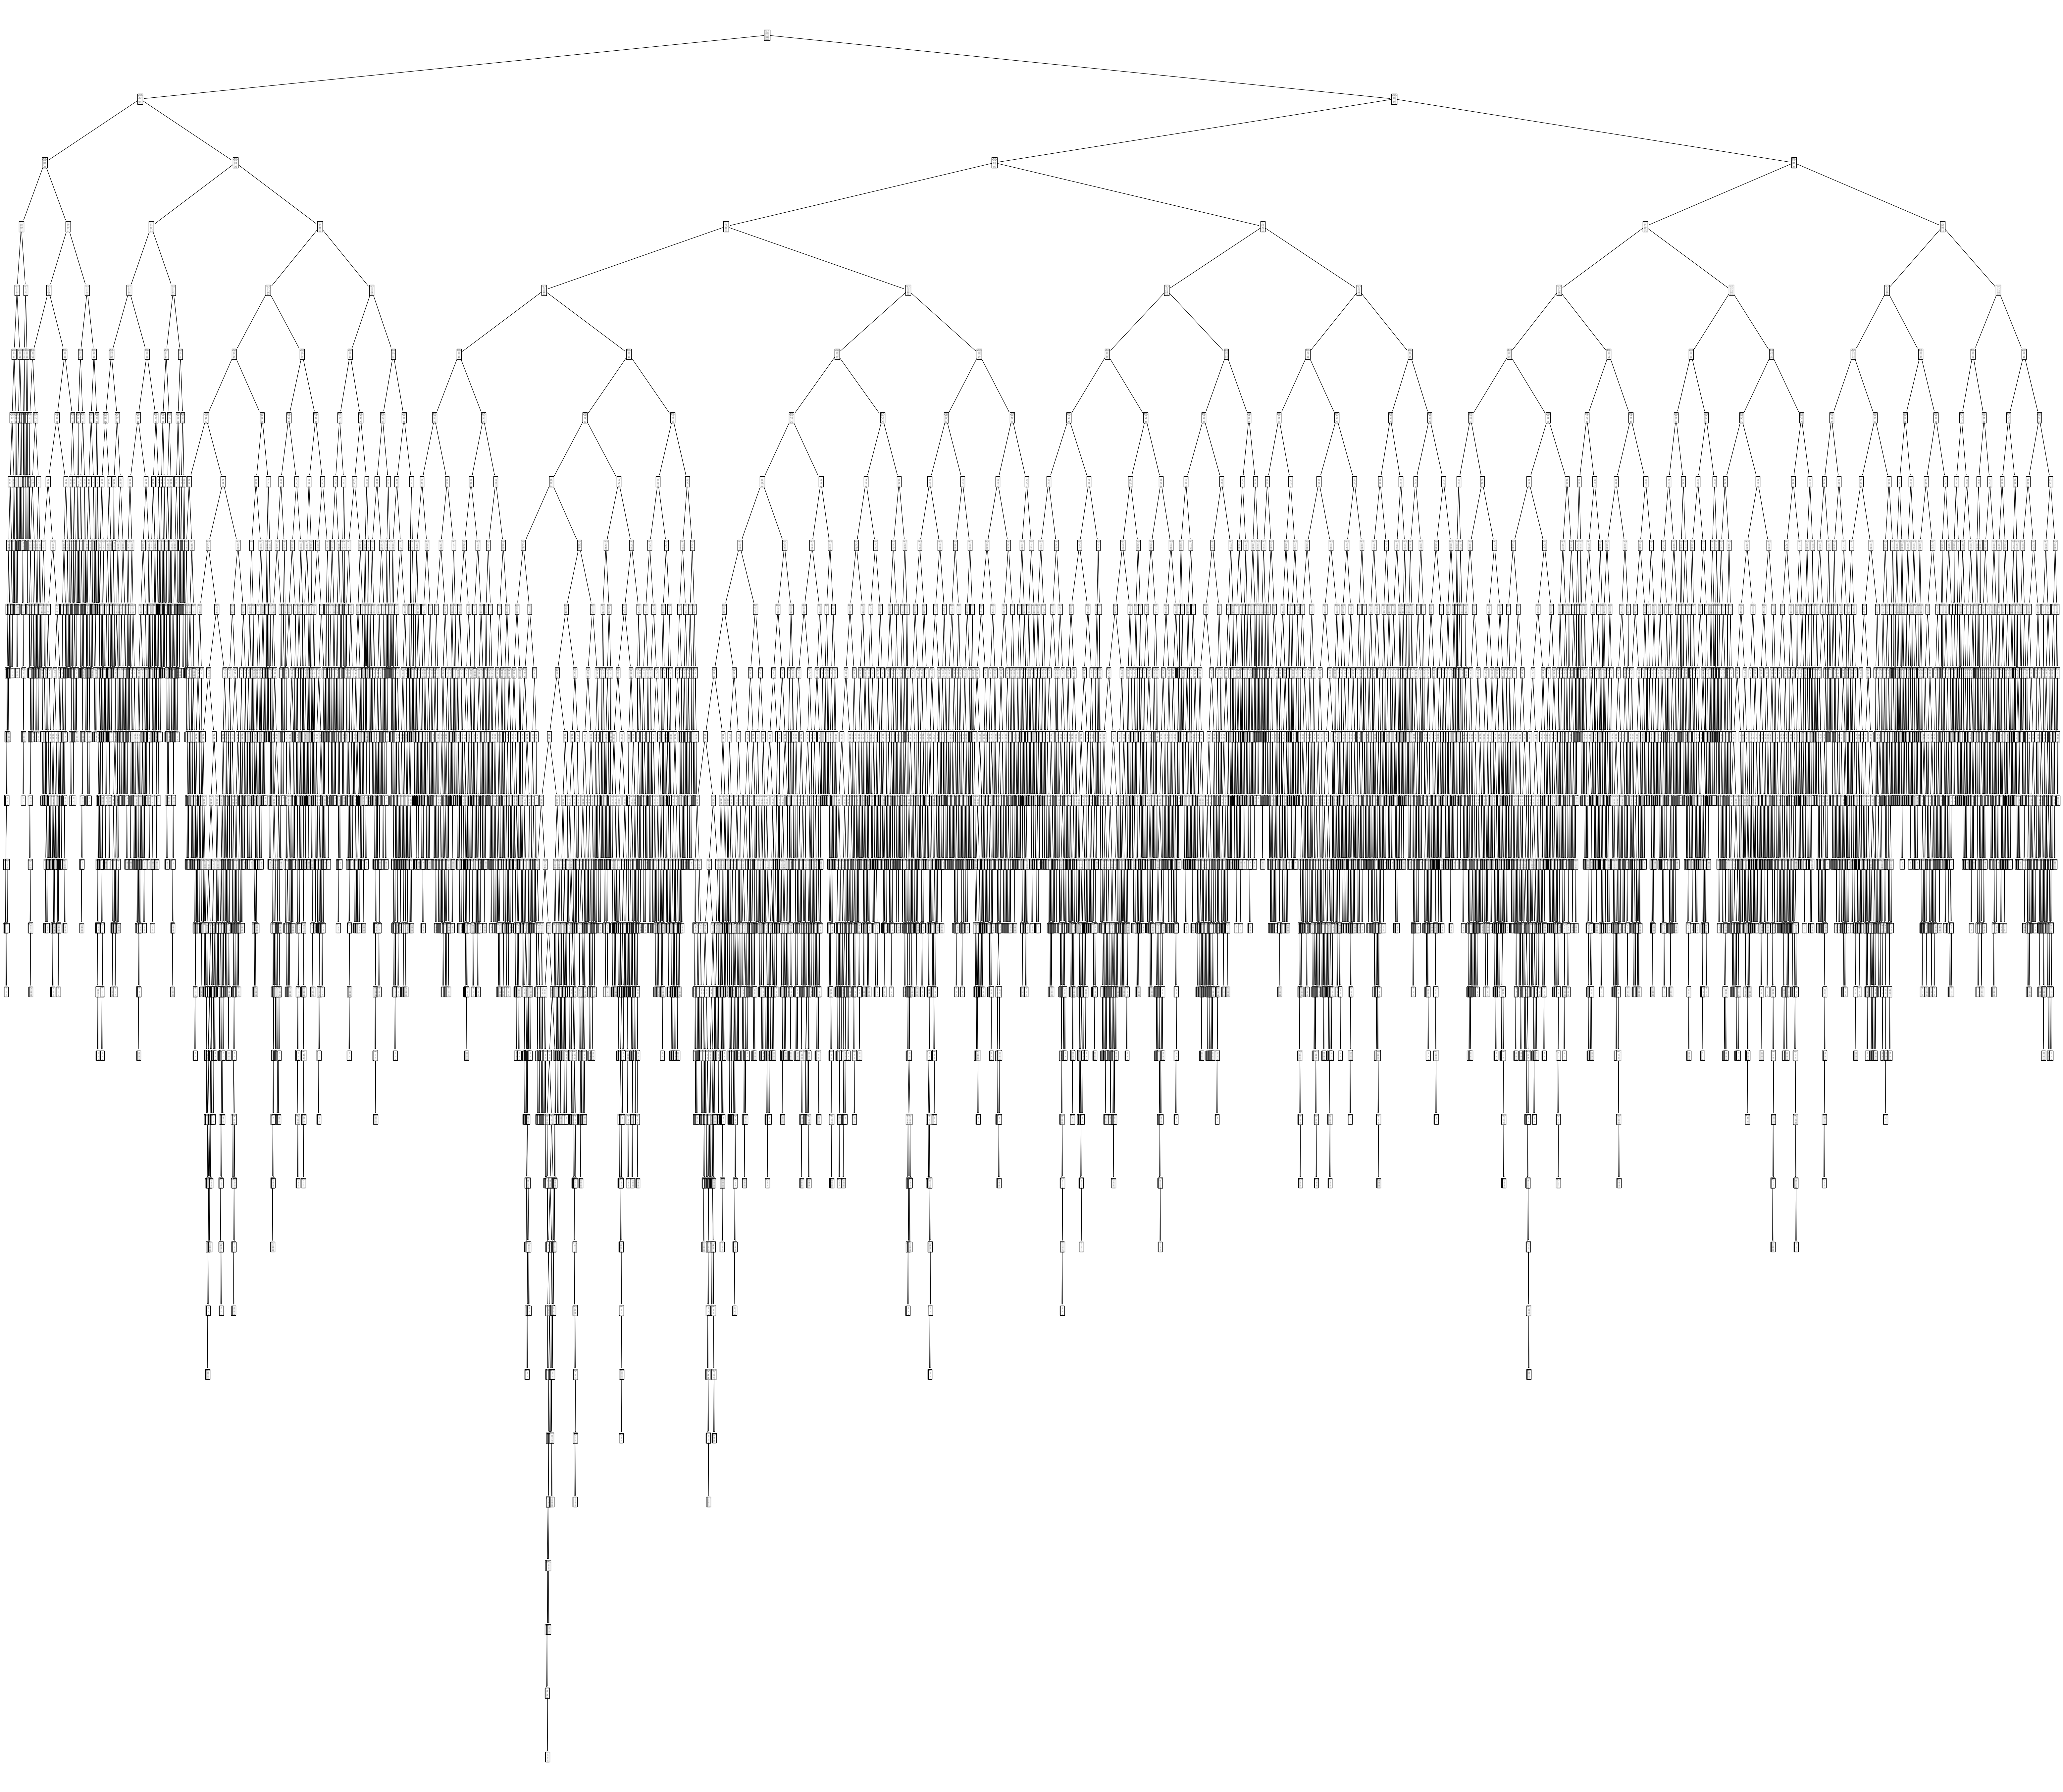

In [25]:
#Run Decision Tree classifier
activedt = DecisionTreeClassifier(criterion='gini', min_samples_split=2)
activedt.fit(X_train, y_train)
figure(figsize=(80,70))
tree.plot_tree(activedt)

In [26]:
#cross validation method
y_pred_train = activedt.predict(X_train)
print('Train accuracy score: ',cross_val_score(activedt, X_train, y_train, cv = 3, scoring='accuracy').mean())

Train accuracy score:  0.6051585574158104


In [27]:
from sklearn.preprocessing import OneHotEncoder

y_train_array = np.array(y_train)

encoder = OneHotEncoder(sparse_output=False)  # Set sparse=False for dense output
y_train_encoded = encoder.fit_transform(y_train_array)
y_pred_train_encoded = encoder.transform(np.array(y_pred_train))

In [28]:
print(y_train_encoded.shape)
print(y_pred_train_encoded.shape)
print(y_train_encoded.dtype)
print(y_pred_train_encoded.dtype)

(17212, 29)
(17212, 29)
float64
float64


In [29]:
from sklearn.metrics import classification_report

report = classification_report(y_train_encoded, y_pred_train_encoded)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12978
           1       1.00      1.00      1.00      4234
           2       1.00      1.00      1.00     11216
           3       1.00      1.00      1.00      5996
           4       1.00      1.00      1.00     11633
           5       1.00      1.00      1.00      5579
           6       1.00      1.00      1.00     13890
           7       1.00      1.00      1.00      3322
           8       1.00      1.00      1.00     13531
           9       1.00      1.00      1.00      3681
          10       1.00      1.00      1.00     13498
          11       1.00      1.00      1.00      3714
          12       1.00      1.00      1.00     14436
          13       1.00      1.00      1.00      2776
          14       1.00      1.00      1.00     12426
          15       1.00      1.00      1.00      4786
          16       1.00      1.00      1.00     13646
          17       1.00    

ValueError: multilabel-indicator is not supported

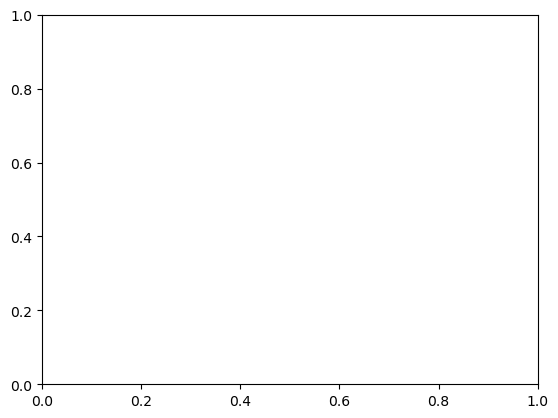

In [30]:
#Confusion matrix based on the last "k" in the sequence
ax= plt.subplot()

cm = confusion_matrix(y_train_encoded,y_pred_train_encoded)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);